# ITS Analysis Package „ÅÆ‰ΩøÁî®‰æã

„Åì„ÅÆ„Éé„Éº„Éà„Éñ„ÉÉ„ÇØ„ÅØ„ÄÅITAS_mock.py „ÅÆ„Çµ„É≥„Éó„É´„Éá„Éº„Çø„Çí‰Ωø„Å£„Å¶‰ΩúÊàê„Åó„ÅüITS Analysis Package„ÅÆ‰ΩøÁî®ÊñπÊ≥ï„ÇíÁ§∫„Åó„Åæ„Åô„ÄÇ

## ÁõÆÊ¨°
1. [Cigar Data „Çí‰Ωø„Å£„Åü ITSÂàÜÊûê„ÅÆ‰æã](#cigar-data)
2. [ÂêàÊàê„Éá„Éº„Çø„Çí‰Ωø„Å£„Åü ITSÂàÜÊûê„ÅÆ‰æã](#synthetic-data)
3. [ÊúÄ„ÇÇÁ∞°Âçò„Å™‰ΩøÁî®‰æã](#simple-example)


## Âü∫Êú¨ÁöÑ„Å™ËÄÉ„Åà

$$
y_t = \beta_0 + \beta_1 t + \beta_2 D_t + \beta_3 \Delta_t + \sum_{j=1}^{p} \eta_j X_{j,t} +\epsilon_j
$$

„Åì„Åì„Åß„ÄÅ
- $y_t$: ÊôÇÁÇπ $t$ „Å´„Åä„Åë„Çã„Ç¢„Ç¶„Éà„Ç´„É†
- $t$: ÊôÇÁÇπ
- $D_t$: ‰ªãÂÖ•„ÅåË°å„Çè„Çå„ÅüÂæå„ÅÆÊôÇÁÇπ„Åß„ÅØ1„ÄÅ„Åù„Çå‰ª•Ââç„ÅÆÊôÇÁÇπ„Åß„ÅØ0
- $\Delta_t$: ‰ªãÂÖ•Âæå„ÅÆÊôÇÁÇπ„Å´„Åä„Åë„ÇãÊôÇÈñì„ÅÆÁµåÈÅé„ÇíË°®„Åô
- $X_{j,t}$: ÂÖ±Â§âÈáè
- $\epsilon_t$: Ë™§Â∑ÆÈ†Ö

In [1]:
# ÂøÖË¶Å„Å™„É©„Ç§„Éñ„É©„É™„ÅÆ„Ç§„É≥„Éù„Éº„Éà
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# ‰ΩúÊàê„Åó„Åü„ÇØ„É©„Çπ„Çí„Ç§„É≥„Éù„Éº„Éà
from module.its_analysis import ITSDataPreprocessor, ITSModel, ITSVisualizer

# „Éó„É≠„ÉÉ„ÉàË®≠ÂÆö
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("ITS Analysis Package „ÅÆ‰ΩøÁî®‰æã„Éé„Éº„Éà„Éñ„ÉÉ„ÇØ„Å∏„Çà„ÅÜ„Åì„ÅùÔºÅ")

ITS Analysis Package „ÅÆ‰ΩøÁî®‰æã„Éé„Éº„Éà„Éñ„ÉÉ„ÇØ„Å∏„Çà„ÅÜ„Åì„ÅùÔºÅ


## 1. Cigar Data „Çí‰Ωø„Å£„Åü ITSÂàÜÊûê„ÅÆ‰æã {#cigar-data}

statsmodels„ÅÆCigar„Éá„Éº„Çø„Çª„ÉÉ„Éà„Çí‰ΩøÁî®„Åó„Å¶„ÄÅÂÖÉ„ÅÆITAS_mock.py„Å®ÂêåÁ≠â„ÅÆÂàÜÊûê„ÇíÂÆüË°å„Åó„Åæ„Åô„ÄÇ

In [2]:
print("=== Cigar Data „Çí‰Ωø„Å£„Åü ITSÂàÜÊûê„ÅÆ‰æã ===")

# 1. „Éá„Éº„Çø„ÅÆË™≠„ÅøËæº„ÅøÔºàITAS_mock.py„Å®Âêå„Åò„Éá„Éº„ÇøÔºâ
cigar = sm.datasets.get_rdataset("Cigar", "Ecdat").data
print(f"ÂÖÉ„Éá„Éº„Çø„ÅÆÂΩ¢Áä∂: {cigar.shape}")
print(f"„Éá„Éº„Çø„ÅÆÊúüÈñì: {cigar['year'].min()} - {cigar['year'].max()}")
print(f"Â∑û„ÅÆÊï∞: {cigar['state'].nunique()}")

# „Éá„Éº„Çø„ÅÆÁµû„ÇäËæº„ÅøÔºàITAS_mock.py„Å®ÂêåÊßòÔºâ
target_states = [3, 5]
condition = (
    (cigar['year'] >= 70) &
    (cigar['state'].isin(target_states))
)
cigar_filtered = cigar[condition].copy().reset_index(drop=True)
print(f"„Éï„Ç£„É´„ÇøÂæå„ÅÆ„Éá„Éº„ÇøÂΩ¢Áä∂: {cigar_filtered.shape}")

# „Éá„Éº„Çø„ÅÆÁ¢∫Ë™ç
display(cigar_filtered.head())

=== Cigar Data „Çí‰Ωø„Å£„Åü ITSÂàÜÊûê„ÅÆ‰æã ===
ÂÖÉ„Éá„Éº„Çø„ÅÆÂΩ¢Áä∂: (1380, 9)
„Éá„Éº„Çø„ÅÆÊúüÈñì: 63 - 92
Â∑û„ÅÆÊï∞: 46
„Éï„Ç£„É´„ÇøÂæå„ÅÆ„Éá„Éº„ÇøÂΩ¢Áä∂: (46, 9)


state  year  price     pop   pop16   cpi          ndi  sales  pimin
0      3    70   37.1  1772.0  1226.6  38.8  3269.815641  115.2   34.6
1      3    71   38.5  1878.0  1313.5  40.5  3549.701945  109.6   36.6
2      3    72   38.0  1975.0  1393.6  41.8  3800.670107  125.0   37.2
3      3    73   38.7  2075.0  1476.5  44.4  4219.983168  128.3   36.5
4      3    74   39.2  2156.0  1547.0  49.3  4508.131798  133.1   37.8

In [3]:
# 2. ITS„Éá„Éº„Çø„ÅÆÂâçÂá¶ÁêÜ
preprocessor = ITSDataPreprocessor(
    time_column='year',
    intervention_point=78,  # 1978Âπ¥„Å´‰ªãÂÖ•
    group_column='state'
)

processed_data = preprocessor.fit_transform(cigar_filtered)
print(f"Âá¶ÁêÜÂæå„ÅÆ„Éá„Éº„ÇøÂΩ¢Áä∂: {processed_data.shape}")
print("‰ΩúÊàê„Åï„Çå„ÅüÂ§âÊï∞:", preprocessor.get_its_variables())

# „Éá„Éº„Çø„ÅÆÁ¢∫Ë™ç
print("\nÂá¶ÁêÜÂæå„Éá„Éº„Çø„ÅÆ„Çµ„É≥„Éó„É´:")
display(processed_data[['year', 'state', 't', 'T', 'D', 'time_after', 'sales']].head(30))

Âá¶ÁêÜÂæå„ÅÆ„Éá„Éº„ÇøÂΩ¢Áä∂: (46, 14)
‰ΩúÊàê„Åï„Çå„ÅüÂ§âÊï∞: ['const', 't', 'D', 'time_after']

Âá¶ÁêÜÂæå„Éá„Éº„Çø„ÅÆ„Çµ„É≥„Éó„É´:


year  state   t  T  D  time_after  sales
0     70      3   1  0  0           0  115.2
1     71      3   2  0  0           0  109.6
2     72      3   3  0  0           0  125.0
3     73      3   4  0  0           0  128.3
4     74      3   5  0  0           0  133.1
5     75      3   6  0  0           0  121.8
6     76      3   7  0  0           0  122.3
7     77      3   8  0  0           0  121.7
8     78      3   9  1  1           1  124.7
9     79      3  10  0  1           2  124.6
10    80      3  11  0  1           3  126.8
11    81      3  12  0  1           4  113.8
12    82      3  13  0  1           5  113.5
13    83      3  14  0  1           6  111.1
14    84      3  15  0  1           7  107.1
15    85      3  16  0  1           8  107.1
16    86      3  17  0  1           9  107.9
17    87      3  18  0  1          10  106.1
18    88      3  19  0  1          11  102.2
19    89      3  20  0  1          12   96.8
20    90      3  21  0  1          13   88.9
21    91      3  22  0  1          14   81.2
22    92      3  23  0  1          15   79.0
23    70      5   1  0  0           0  123.0
24    71      5   2  0  0           0  121.0
25    72      5   3  0  0           0  123.5
26    73      5   4  0  0           0  124.4
27    74      5   5  0  0           0  126.7
28    75      5   6  0  0           0  127.1
29    76      5   7  0  0           0  128.0

In [4]:
# 3. ITS„É¢„Éá„É´„ÅÆÂÆüË°å
model = ITSModel(
    time_column='year',
    intervention_point=78,
    group_column='state'
)

# Â∑û„ÇíÂÖ±Â§âÈáè„Å®„Åó„Å¶Âê´„ÇÅ„Å¶„É¢„Éá„É´ÂÆüË°å
results = model.fit(
    processed_data, 
    target_column='sales',
    covariates=['state']
)

print("\n=== „É¢„Éá„É´ÁµêÊûú„ÅÆ„Çµ„Éû„É™„Éº ===")
model.summary()


=== „É¢„Éá„É´ÁµêÊûú„ÅÆ„Çµ„Éû„É™„Éº ===
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     41.59
Date:                Mon, 29 Sep 2025   Prob (F-statistic):           6.47e-14
Time:                        10:56:11   Log-Likelihood:                -137.94
No. Observations:                  46   AIC:                             285.9
Df Residuals:                      41   BIC:                             295.0
Df Model:                           4                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       

In [5]:
# 4. ‰∫àÊ∏¨ÂÄ§„ÅÆÂèñÂæó
predictions = model.predict(return_ci=True)
print(f"‰∫àÊ∏¨ÂÄ§„ÅÆÂΩ¢Áä∂: {predictions.shape}")
print("‰∫àÊ∏¨ÂÄ§„ÅÆÂàó:", predictions.columns.tolist())

# ‰øÇÊï∞„ÅÆËß£Èáà
print("\n=== ‰øÇÊï∞„ÅÆËß£Èáà ===")
params = results.params
pvalues = results.pvalues

print(f"ÂàáÁâá (const): {params['const']:.2f} (p={pvalues['const']:.3f})")
print(f"‰ªãÂÖ•Ââç„Éà„É¨„É≥„Éâ (t): {params['t']:.2f} (p={pvalues['t']:.3f})")
print(f"‰ªãÂÖ•„É¨„Éô„É´ÂäπÊûú (D): {params['D']:.2f} (p={pvalues['D']:.3f})")
print(f"‰ªãÂÖ•„Éà„É¨„É≥„ÉâÂäπÊûú (time_after): {params['time_after']:.2f} (p={pvalues['time_after']:.3f})")

‰∫àÊ∏¨ÂÄ§„ÅÆÂΩ¢Áä∂: (46, 6)
‰∫àÊ∏¨ÂÄ§„ÅÆÂàó: ['mean', 'mean_se', 'mean_ci_lower', 'mean_ci_upper', 'obs_ci_lower', 'obs_ci_upper']

=== ‰øÇÊï∞„ÅÆËß£Èáà ===
ÂàáÁâá (const): 124.36 (p=0.000)
‰ªãÂÖ•Ââç„Éà„É¨„É≥„Éâ (t): 1.05 (p=0.187)
‰ªãÂÖ•„É¨„Éô„É´ÂäπÊûú (D): 5.57 (p=0.065)
‰ªãÂÖ•„Éà„É¨„É≥„ÉâÂäπÊûú (time_after): -4.75 (p=0.000)


Âõ≥„Çí‰øùÂ≠ò„Åó„Åæ„Åó„Åü: output/cigar_its_analysis.png


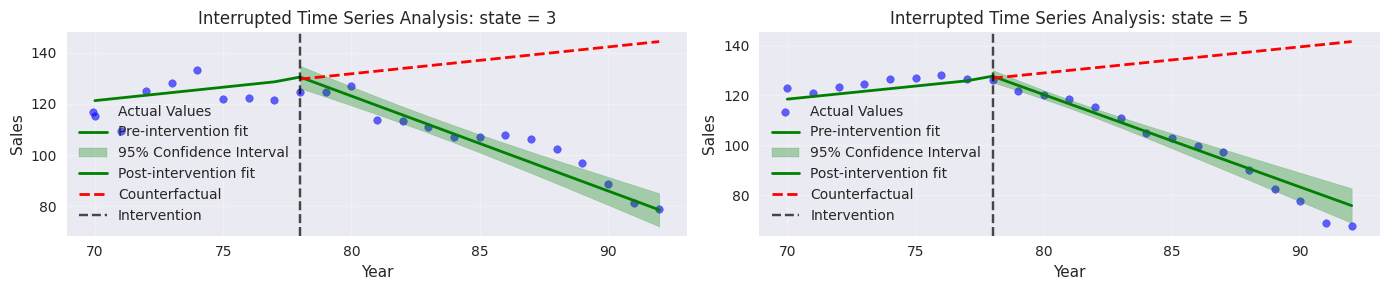

In [6]:
# 5. ÂèØË¶ñÂåñ
visualizer = ITSVisualizer(model)

# „Ç∞„É´„Éº„ÉóÂà•„ÅÆÂèØË¶ñÂåñ
fig = visualizer.plot(
    group_column='state',
    figsize=(14, 6),
    save_path='output/cigar_its_analysis.png',
    show_counterfactual=True,
    show_confidence_interval=True
)

plt.show()

In [ ]:
# 6. „É¢„Éá„É´„ÅÆ‰øùÂ≠ò
model.save_model('models/cigar_its_model.pkl')
print("„É¢„Éá„É´„Çí 'models/cigar_its_model.pkl' „Å´‰øùÂ≠ò„Åó„Åæ„Åó„Åü")

## 2. ÂêàÊàê„Éá„Éº„Çø„Çí‰Ωø„Å£„Åü ITSÂàÜÊûê„ÅÆ‰æã {#synthetic-data}

Ë§áÊï∞„ÅÆ„Ç∞„É´„Éº„Éó„Å®ÂÖ±Â§âÈáè„ÇíÂê´„ÇÄÂêàÊàê„Éá„Éº„Çø„Çí‰ΩøÁî®„Åó„Å¶„ÄÅ„Çà„ÇäË§áÈõë„Å™ÂàÜÊûê‰æã„ÇíÁ§∫„Åó„Åæ„Åô„ÄÇ

In [7]:
print("=== ÂêàÊàê„Éá„Éº„Çø„Çí‰Ωø„Å£„Åü ITSÂàÜÊûê„ÅÆ‰æã ===")

# 1. ÂêàÊàê„Éá„Éº„Çø„ÅÆ‰ΩúÊàê
np.random.seed(42)

# „Éë„É©„É°„Éº„ÇøË®≠ÂÆö
n_pre = 20   # ‰ªãÂÖ•Ââç„ÅÆÊúüÈñìÊï∞
n_post = 20  # ‰ªãÂÖ•Âæå„ÅÆÊúüÈñìÊï∞
n_groups = 3 # „Ç∞„É´„Éº„ÉóÊï∞

baseline = 100
trend = 2.0
intervention_level_change = 15
intervention_trend_change = -1.0
noise_std = 8

data_list = []

for group_id in ['Group_A', 'Group_B', 'Group_C']:
    # ÂêÑ„Ç∞„É´„Éº„Éó„ÅÆ„Éá„Éº„ÇøÁîüÊàê
    time_points = np.arange(1, n_pre + n_post + 1)
    
    # „Éô„Éº„Çπ„É©„Ç§„É≥ + „Éà„É¨„É≥„Éâ
    values = baseline + trend * time_points
    
    # ‰ªãÂÖ•ÂäπÊûúÔºà„É¨„Éô„É´„Ç∑„Éï„Éà + „Éà„É¨„É≥„ÉâÂ§âÂåñÔºâ
    post_intervention_mask = time_points > n_pre
    values[post_intervention_mask] += intervention_level_change
    values[post_intervention_mask] += intervention_trend_change * (time_points[post_intervention_mask] - n_pre)
    
    # „Ç∞„É´„Éº„ÉóÂà•„ÅÆÂäπÊûúÔºà‰æã„Å®„Åó„Å¶Ôºâ
    if group_id == 'Group_B':
        values += 20  # Group_B„ÅØÂÖ®‰ΩìÁöÑ„Å´È´ò„ÅÑ
    elif group_id == 'Group_C':
        values += 10  # Group_C„ÅØ‰∏≠Á®ãÂ∫¶
    
    # „Éé„Ç§„Ç∫„ÅÆËøΩÂä†
    values += np.random.normal(0, noise_std, len(values))
    
    # „Éá„Éº„Çø„Éï„É¨„Éº„É†„Å´ËøΩÂä†
    for i, time_point in enumerate(time_points):
        data_list.append({
            'time': time_point,
            'group': group_id,
            'outcome': values[i],
            'covariate_1': np.random.normal(50, 10),  # ÈÄ£Á∂öÂÖ±Â§âÈáè
            'covariate_2': np.random.choice(['Type1', 'Type2'], p=[0.6, 0.4])  # „Ç´„ÉÜ„Ç¥„É™„Ç´„É´ÂÖ±Â§âÈáè
        })

synthetic_data = pd.DataFrame(data_list)
print(f"ÂêàÊàê„Éá„Éº„Çø„ÅÆÂΩ¢Áä∂: {synthetic_data.shape}")
print(f"ÊôÇÈñì„ÅÆÁØÑÂõ≤: {synthetic_data['time'].min()} - {synthetic_data['time'].max()}")
print(f"„Ç∞„É´„Éº„Éó: {synthetic_data['group'].unique()}")

display(synthetic_data.head())

=== ÂêàÊàê„Éá„Éº„Çø„Çí‰Ωø„Å£„Åü ITSÂàÜÊûê„ÅÆ‰æã ===
ÂêàÊàê„Éá„Éº„Çø„ÅÆÂΩ¢Áä∂: (120, 5)
ÊôÇÈñì„ÅÆÁØÑÂõ≤: 1 - 40
„Ç∞„É´„Éº„Éó: ['Group_A' 'Group_B' 'Group_C']


time    group     outcome  covariate_1 covariate_2
0     1  Group_A  105.973713    57.384666       Type1
1     2  Group_A  102.893886    51.713683       Type1
2     3  Group_A  111.181508    48.843517       Type1
3     4  Group_A  120.184239    46.988963       Type1
4     5  Group_A  108.126773    45.393612       Type1

In [8]:
# 2. ITS„É¢„Éá„É´„ÅÆÈÅ©Áî®
model_synthetic = ITSModel(
    time_column='time',
    intervention_point=n_pre + 1,  # 21ÊôÇÁÇπÁõÆ„Å´‰ªãÂÖ•
    group_column='group'
)

# Ë§áÊï∞„ÅÆÂÖ±Â§âÈáè„ÇíÂê´„ÇÅ„Å¶„Éï„Ç£„ÉÉ„Éà
results_synthetic = model_synthetic.fit(
    synthetic_data,
    target_column='outcome',
    covariates=['group', 'covariate_1', 'covariate_2']
)

print("\n=== ÂêàÊàê„Éá„Éº„Çø„ÅÆ„É¢„Éá„É´ÁµêÊûú ===")
model_synthetic.summary()


=== ÂêàÊàê„Éá„Éº„Çø„ÅÆ„É¢„Éá„É´ÁµêÊûú ===
                            OLS Regression Results                            
Dep. Variable:                outcome   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     281.7
Date:                Mon, 29 Sep 2025   Prob (F-statistic):           5.29e-68
Time:                        10:57:16   Log-Likelihood:                -416.25
No. Observations:                 120   AIC:                             848.5
Df Residuals:                     112   BIC:                             870.8
Df Model:                           7                                         
Covariance Type:                  HAC                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------

Âõ≥„Çí‰øùÂ≠ò„Åó„Åæ„Åó„Åü: output/synthetic_its_analysis.png


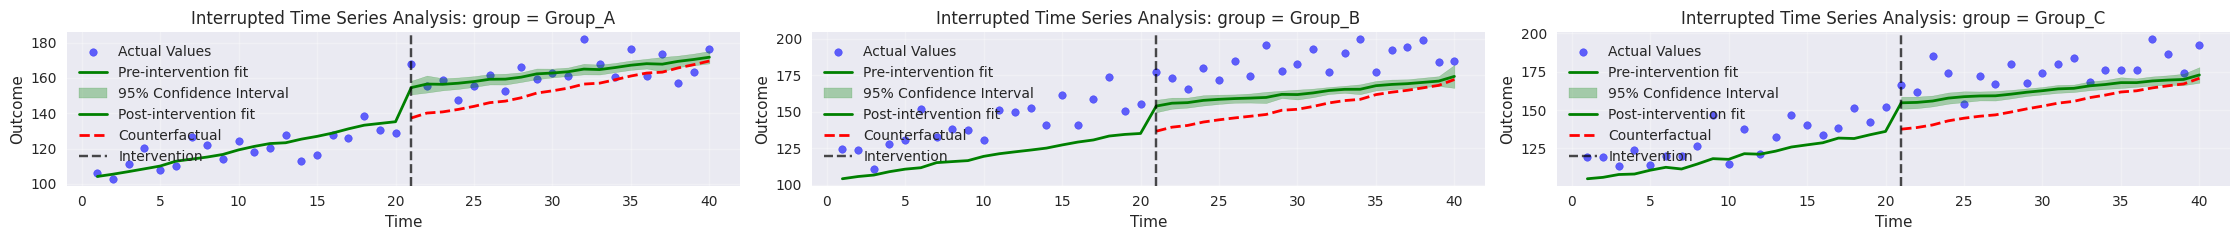

In [9]:
# 3. ÂèØË¶ñÂåñ
visualizer_synthetic = ITSVisualizer(model_synthetic)

fig = visualizer_synthetic.plot(
    group_column='group',
    figsize=(15, 5),
    save_path='output/synthetic_its_analysis.png',
    show_counterfactual=True,
    show_confidence_interval=True
)

plt.show()

In [ ]:
# 4. „É¢„Éá„É´„ÅÆ‰øùÂ≠ò„Å®Ë™≠„ÅøËæº„Åø„ÅÆ„ÉÜ„Çπ„Éà
model_synthetic.save_model('models/synthetic_its_model.pkl')

# Êñ∞„Åó„ÅÑ„É¢„Éá„É´„Ç§„É≥„Çπ„Çø„É≥„Çπ„ÅßË™≠„ÅøËæº„Åø
loaded_model = ITSModel('dummy', 999)
loaded_model.load_model('models/synthetic_its_model.pkl')

# ‰∫àÊ∏¨ÁµêÊûú„ÅåÂêå„Åò„Åã„ÉÅ„Çß„ÉÉ„ÇØ
original_pred = model_synthetic.predict()
loaded_pred = loaded_model.predict()

print(f"ÂÖÉ„É¢„Éá„É´„Å®Ë™≠„ÅøËæº„Åø„É¢„Éá„É´„ÅÆ‰∫àÊ∏¨ÂÄ§„ÅÆÂ∑Æ„ÅÆÊúÄÂ§ßÂÄ§: {np.abs(original_pred - loaded_pred).max():.10f}")
print("‚úÖ „É¢„Éá„É´„ÅÆ‰øùÂ≠ò„ÉªË™≠„ÅøËæº„Åø„ÅåÊ≠£Â∏∏„Å´ÂÆå‰∫Ü„Åó„Åæ„Åó„Åü")

## 3. ÊúÄ„ÇÇÁ∞°Âçò„Å™‰ΩøÁî®‰æã {#simple-example}

ÊúÄÂ∞èÈôê„ÅÆ„Ç≥„Éº„Éâ„ÅßITSÂàÜÊûê„ÇíÂÆüË°å„Åô„Çã‰æã„Åß„Åô„ÄÇ

=== ÊúÄ„ÇÇÁ∞°Âçò„Å™‰ΩøÁî®‰æã ===
„Éá„Éº„Çø„ÅÆÊ¶ÇË¶Å:


time      value
count  30.000000  30.000000
mean   15.500000  12.589428
std     8.803408   3.830976
min     1.000000   5.146642
25%     8.250000   9.119571
50%    15.500000  12.757326
75%    22.750000  15.509245
max    30.000000  19.411860

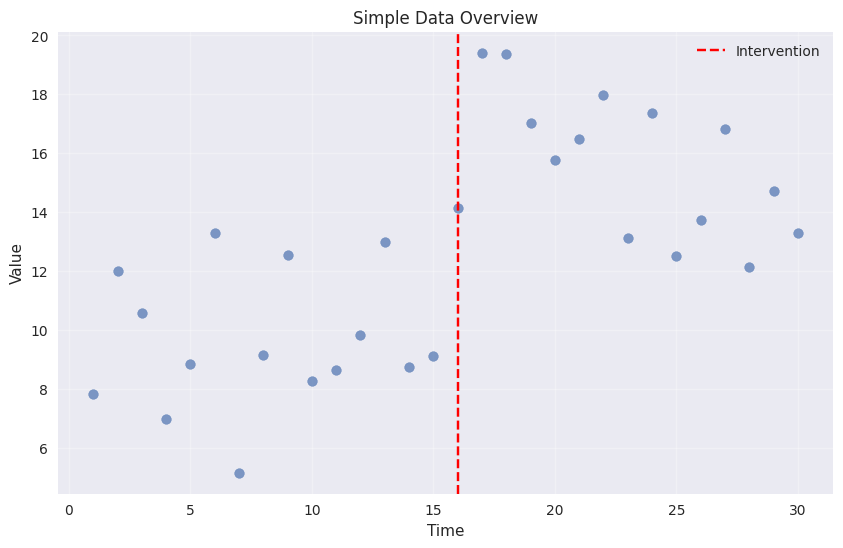

In [10]:
print("=== ÊúÄ„ÇÇÁ∞°Âçò„Å™‰ΩøÁî®‰æã ===")

# „Ç∑„É≥„Éó„É´„Å™„Éá„Éº„Çø‰ΩúÊàê
np.random.seed(123)
simple_data = pd.DataFrame({
    'time': range(1, 31),  # 30ÊúüÈñì
    'value': np.concatenate([
        np.random.normal(10, 2, 15),  # ‰ªãÂÖ•Ââç
        np.random.normal(15, 2, 15)   # ‰ªãÂÖ•ÂæåÔºàÂäπÊûú„ÅÇ„ÇäÔºâ
    ])
})

print("„Éá„Éº„Çø„ÅÆÊ¶ÇË¶Å:")
display(simple_data.describe())

# „Éá„Éº„Çø„ÅÆÂèØË¶ñÂåñ
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.scatter(simple_data['time'], simple_data['value'], alpha=0.7)
ax.axvline(x=16, color='red', linestyle='--', label='Intervention')
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.set_title('Simple Data Overview')
ax.legend()
ax.grid(True, alpha=0.3)
plt.show()

In [11]:
# „ÉØ„É≥„É©„Ç§„Éä„Éº„ÅßÂàÜÊûêÂÆå‰∫Ü
model_simple = ITSModel('time', intervention_point=16)
results_simple = model_simple.fit(simple_data, target_column='value')

# ÁµêÊûú„ÅÆË°®Á§∫
print("Á∞°Âçò„Å™ÂàÜÊûêÁµêÊûú:")
print(f"‰ªãÂÖ•ÂäπÊûú (D‰øÇÊï∞): {results_simple.params['D']:.3f} (p={results_simple.pvalues['D']:.3f})")
print(f"‰ªãÂÖ•Ââç„Éà„É¨„É≥„Éâ (t‰øÇÊï∞): {results_simple.params['t']:.3f} (p={results_simple.pvalues['t']:.3f})")
print(f"‰ªãÂÖ•Âæå„Éà„É¨„É≥„ÉâÂ§âÂåñ (time_after‰øÇÊï∞): {results_simple.params['time_after']:.3f} (p={results_simple.pvalues['time_after']:.3f})")

Á∞°Âçò„Å™ÂàÜÊûêÁµêÊûú:
‰ªãÂÖ•ÂäπÊûú (D‰øÇÊï∞): 8.211 (p=0.000)
‰ªãÂÖ•Ââç„Éà„É¨„É≥„Éâ (t‰øÇÊï∞): 0.034 (p=0.510)
‰ªãÂÖ•Âæå„Éà„É¨„É≥„ÉâÂ§âÂåñ (time_after‰øÇÊï∞): -0.340 (p=0.000)


Âõ≥„Çí‰øùÂ≠ò„Åó„Åæ„Åó„Åü: output/simple_its_example.png


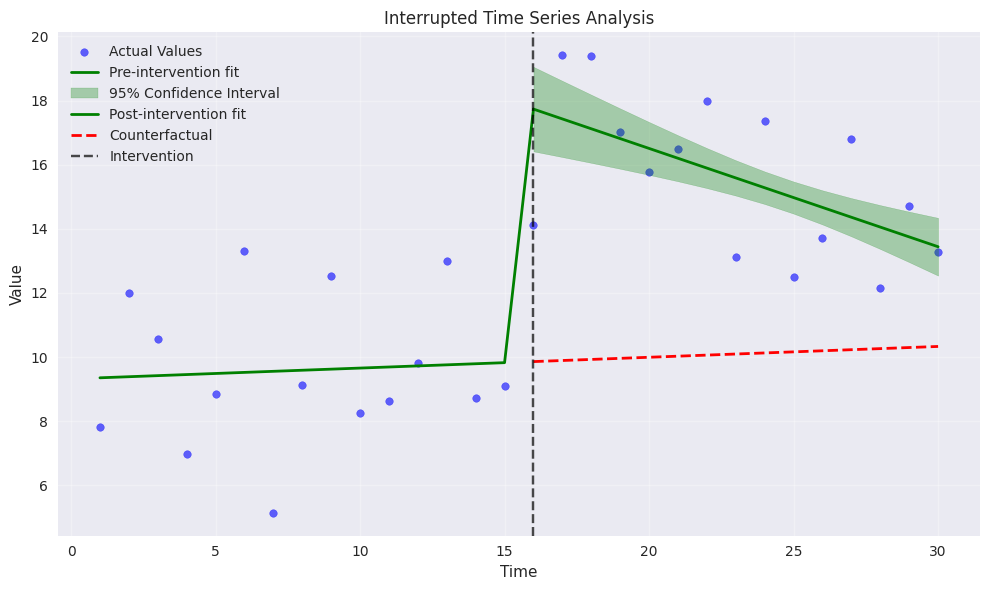

In [12]:
# Á∞°Âçò„Å™ÂèØË¶ñÂåñ
visualizer_simple = ITSVisualizer(model_simple)
fig = visualizer_simple.plot(
    figsize=(10, 6), 
    save_path='output/simple_its_example.png'
)
plt.show()

In [ ]:
# ÊúÄÁµÇÁ¢∫Ë™ç
print("=== ÂÖ®„Å¶„ÅÆ‰æã„ÅåÊ≠£Â∏∏„Å´ÂÆå‰∫Ü„Åó„Åæ„Åó„Åü ===")
print("‰ΩúÊàê„Åï„Çå„Åü„Éï„Ç°„Ç§„É´:")
output_files = [
    'output/cigar_its_analysis.png', 
    'output/synthetic_its_analysis.png',
    'output/simple_its_example.png'
]
model_files = [
    'models/cigar_its_model.pkl',
    'models/synthetic_its_model.pkl'
]

for filename in output_files + model_files:
    if Path(filename).exists():
        print(f"  ‚úÖ {filename}")
    else:
        print(f"  ‚ùå {filename} (‰ΩúÊàê„Åï„Çå„Åæ„Åõ„Çì„Åß„Åó„Åü)")

print("\nüéâ ITS Analysis Package „ÅÆ‰ΩøÁî®‰æã„Éé„Éº„Éà„Éñ„ÉÉ„ÇØ„ÅåÂÆå‰∫Ü„Åó„Åæ„Åó„ÅüÔºÅ")